In [1]:
from pathlib import Path

from wildlife_datasets import datasets, splits

root = "/mnt/scratch/ai4animals/visual_eda"
root = Path(root)
root.mkdir(parents=True, exist_ok=True)

datasets.WhaleSharkID.get_data(root=f"{root}/whalesharkid")
metadata = datasets.WhaleSharkID(root=f"{root}/whalesharkid")

/home/anthony/ai4animals/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DATASET WhaleSharkID: DOWNLOADING STARTED.
You are trying to download an already downloaded dataset.
        This message may have happened to due interrupted download or extract.
        To force the download use the `force=True` keyword such as
        get_data(..., force=True) or download(..., force=True).
        


In [2]:
metadata.summary

{'licenses': 'Community Data License Agreement – Permissive',
 'licenses_url': 'https://cdla.dev/permissive-1-0/',
 'url': 'https://lila.science/datasets/whale-shark-id',
 'publication_url': 'https://www.int-res.com/abstracts/esr/v7/n1/p39-53/',
 'cite': 'holmberg2009estimating',
 'animals': {'whale shark'},
 'animals_simple': 'sharks',
 'real_animals': True,
 'year': 2020,
 'reported_n_total': 7693.0,
 'reported_n_identified': 7693.0,
 'reported_n_photos': 7693.0,
 'reported_n_individuals': 543.0,
 'wild': True,
 'clear_photos': False,
 'pose': 'multiple',
 'unique_pattern': True,
 'from_video': False,
 'cropped': False,
 'span': '5.2 years',
 'size': 6466.0}

In [3]:
metadata.df

,image_id,identity,path,bbox,date,orientation,segmentation,species
0,0,10563a2a-4c62-e8c9-e5a5-8582bf2eb059,whaleshark.coco/images/train2020/000000000001.jpg,"[18, 582, 2412, 1248]",NaN,right,NaN,rhincodon_typus
1,1,341569f2-1f34-4884-1dd3-79137be4c77f,whaleshark.coco/images/train2020/000000000002.jpg,"[511, 237, 2387, 1275]",NaN,left,NaN,rhincodon_typus
2,2,69f95579-8a42-8d93-8d78-7b641952933c,whaleshark.coco/images/train2020/000000000003.jpg,"[317, 627, 2196, 832]",NaN,left,NaN,rhincodon_typus
3,3,26560de1-6930-ddaf-5069-f7b85acd40fb,whaleshark.coco/images/train2020/000000000004.jpg,"[78, 7, 2898, 2006]",NaN,left,NaN,rhincodon_typus
4,4,a785af89-b8c0-5e7b-acec-c4874ec5483f,whaleshark.coco/images/train2020/000000000005.jpg,"[198, 414, 2788, 1561]",2017-02-28 12:28:49,left,NaN,rhincodon_typus
...,...,...,...,...,...,...,...,...
7688,7688,431741cc-839f-cbaf-9859-162abfa36ba4,whaleshark.coco/images/train2020/000000007689.jpg,"[0, 254, 2996, 2171]",NaN,left,NaN,rhincodon_typus
7689,7689,13358d13-b940-7836-2d35-d00e8310b297,whaleshark.coco/images/train2020/000000007690.jpg,"[624, 479, 2120, 1512]",NaN,back,NaN,rhincodon_typus
7690,7690,ecec2054-01c7-ed9d-94c6-603a3836f2f2,whaleshark.coco/images/train2020/000000007691.jpg,"[0, 192, 2917, 2191]",NaN,right,NaN,rhincodon_typus
7691,7691,461d166d-0321-fe1b-8796-dbcb72672a64,whaleshark.coco/images/train2020/000000007692.jpg,"[53, 287, 2941, 2092]",NaN,left,NaN,rhincodon_typus


Number of identitites            543
Number of all animals            7693
Number of animals with one image 31
Number of unidentified animals   0
Images span                      5.2 years


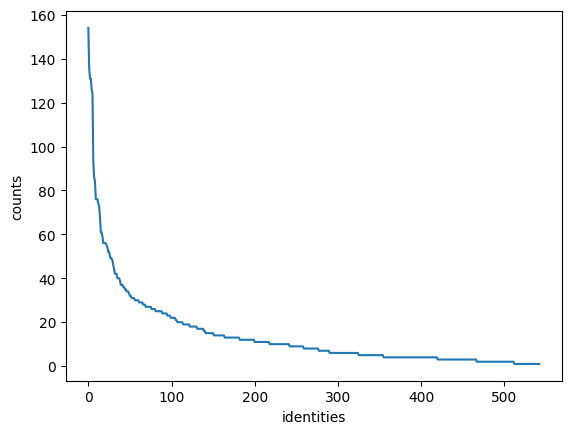

In [4]:
from wildlife_datasets.analysis import display_statistics

display_statistics(metadata.df)

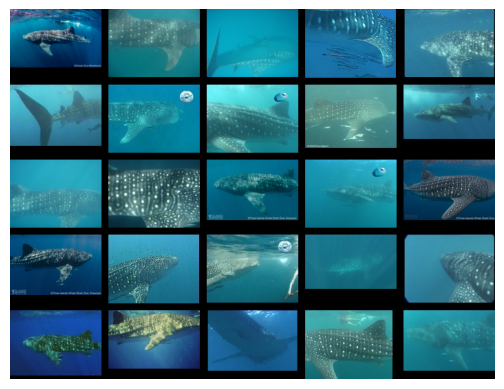

In [5]:
import matplotlib.pyplot as plt

metadata.plot_grid(n_cols=5)
plt.show()

In [6]:
splitter = splits.ClosedSetSplit(0.8)
idx_train, idx_test = splitter.split(metadata.df)[0]
splits.analyze_split(metadata.df, idx_train, idx_test)

Split: time-unaware closed-set
Samples: train/test/unassigned/total = 6108/1585/0/7693
Classes: train/test/unassigned/total = 543/512/0/543
Samples: train only/test only        = 31/0
Classes: train only/test only/joint  = 31/0/512

Fraction of train set     = 79.40%
Fraction of test set only = 0.00%


In [7]:
import torchvision.transforms as T
from wildlife_tools.data import ImageDataset

transform = T.Compose(
    [
        T.Resize([224, 224]),
        T.ToTensor(),
        T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ]
)
dataset = ImageDataset(metadata.df, metadata.root, transform=transform)
dataset_database = ImageDataset(
    metadata.df.iloc[idx_train], metadata.root, transform=transform
)
dataset_query = ImageDataset(
    metadata.df.iloc[idx_test], metadata.root, transform=transform
)

In [8]:
import timm
from wildlife_tools.features import DeepFeatures

name = "hf-hub:BVRA/MegaDescriptor-T-224"
model = timm.create_model(name, num_classes=0, pretrained=True)
extractor = DeepFeatures(model, device="cuda", num_workers=8)
query, database = extractor(dataset_query), extractor(dataset_database)

100%|███████████████████████████████████████████████████████████████| 48/48 [00:56<00:00,  1.17s/it]


In [13]:
from wildlife_tools.similarity import CosineSimilarity

similarity_function = CosineSimilarity()
similarity = similarity_function(query, database)

In [15]:
import numpy as np
from wildlife_tools.inference import KnnClassifier

classifier = KnnClassifier(k=1, database_labels=dataset_database.labels_string)
predictions = classifier(similarity)
accuracy = np.mean(dataset_query.labels_string == predictions)
accuracy

np.float64(0.277602523659306)